In [3]:
from google.colab import drive
import os


drive.mount('/content/drive')

mfcc_data_folder = '/content/drive/My Drive/SHAZAM-CAPSTONE-main/SHAZAM-CAPSTONE-main/ml_processed_data'
hist_data_folder = '/content/drive/My Drive/SHAZAM-CAPSTONE-main/SHAZAM-CAPSTONE-main/hist_data'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This loads the csv files, skips the first row and column of labels, and pads the histogram array to match up with the mfcc array.

Expected data shapes:
X shape: (20, 550, 14)
y shape: (20, 550, 1)

In [4]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

def load_data(directory):
    data = []
    for file_name in sorted(os.listdir(directory)):
        if file_name.endswith('.csv'):
            file_path = os.path.join(directory, file_name)
            df = pd.read_csv(file_path, header=None,skiprows=1)
            data.append(df.iloc[:, 1:].values)  # Using .iloc to exclude the time bin column
    max_length = max(array.shape[0] for array in data)
    padded_data = pad_sequences(data, maxlen=max_length, padding='post', dtype='float32')
    return np.array(padded_data)

# Load the MFCC and histogram data
X = load_data(mfcc_data_folder)  # Shape: (num_samples, time_steps, n_features)
y = load_data(hist_data_folder)  # Shape: (num_samples, time_steps)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")



X shape: (20, 550, 14)
y shape: (20, 550, 1)


My first attempt at LOO (Leave One Out) Cross Validation modeling.

Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5954216.5000
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 4134793.7500
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - loss: 2670406.2500
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - loss: 1702755.5000
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - loss: 1297782.3750
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - loss: 1299179.0000
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - loss: 1345223.7500
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - loss: 1274870.6250
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - loss: 1121740.1250
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - loss: 969652.9375
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - loss: 870779.5000
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - loss: 828499.2500
Epoch 13/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - loss: 821566.1875
Epoch 14/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - loss: 827139.9375
Epoch 15/

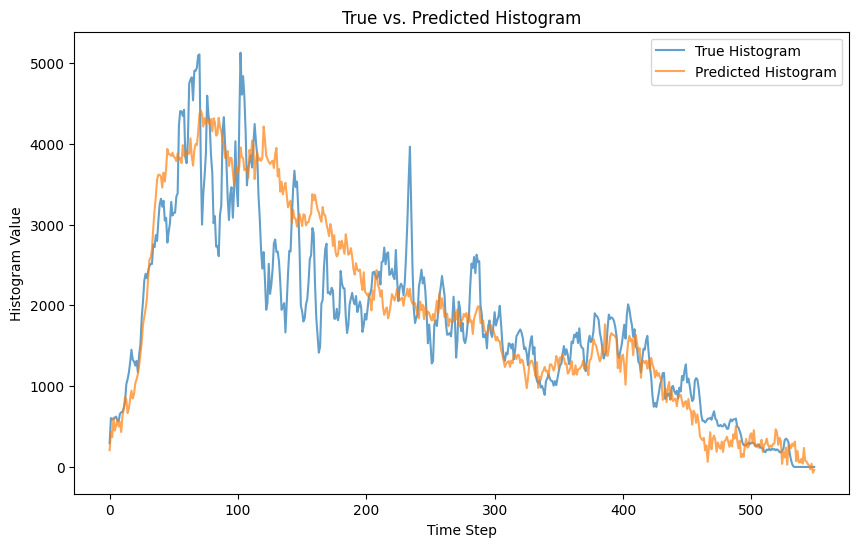

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 6030494.0000
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step - loss: 3979843.7500
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step - loss: 2453785.2500
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - loss: 1548675.8750
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - loss: 1254935.6250
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - loss: 1313443.7500
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - loss: 1351072.5000
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - loss: 1278312.8750
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - loss: 1140276.3750
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - loss: 1000361.0625
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - loss: 900033.8750
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - loss: 847007.5000
Epoch 13/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 828528.8125
Epoch 14/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - loss: 825484.1250
Epoch 15

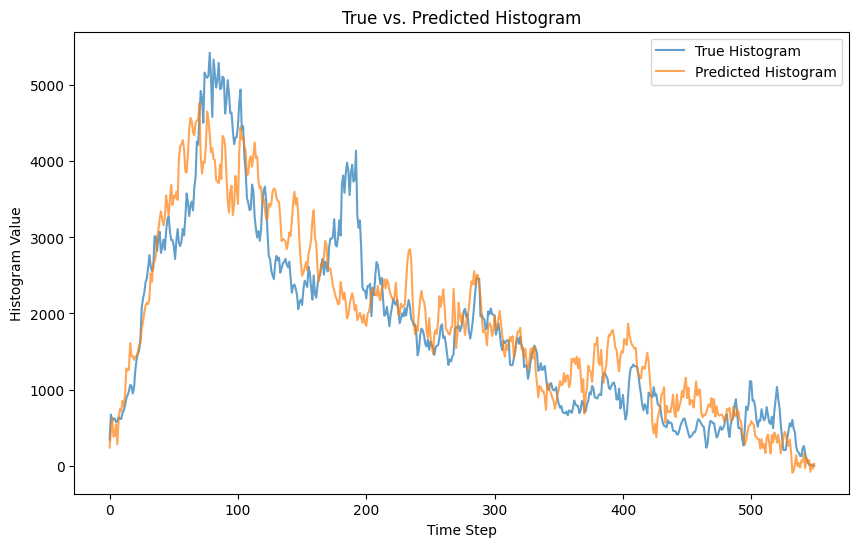

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5943005.5000
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - loss: 4272770.0000
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - loss: 2918054.0000
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - loss: 1945153.2500
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - loss: 1382206.3750
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - loss: 1177723.6250
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - loss: 1194915.3750
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - loss: 1227597.6250
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - loss: 1181935.6250
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - loss: 1079733.0000
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - loss: 970963.6875
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - loss: 883521.3750
Epoch 13/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 821402.3750
Epoch 14/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - loss: 782191.0000
Epoch 15

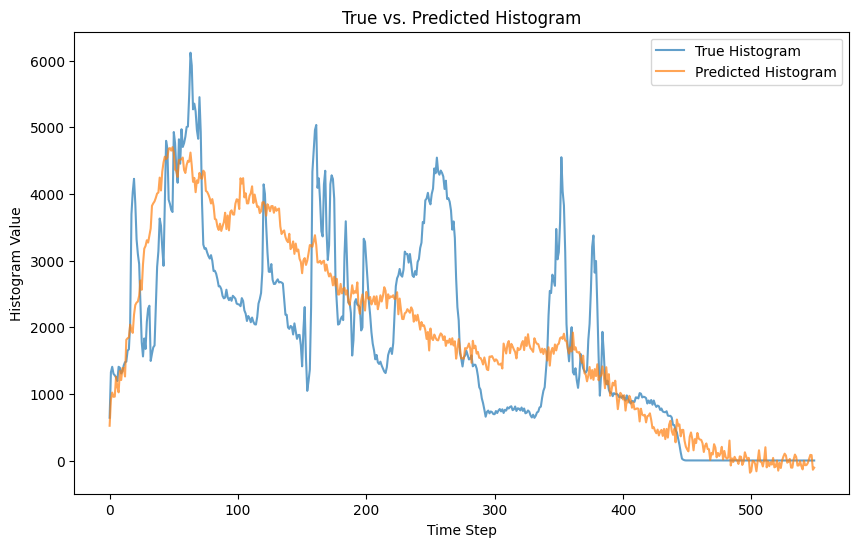

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5810969.5000
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step - loss: 3861744.7500
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 2369544.2500
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - loss: 1481529.0000
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - loss: 1219552.3750
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - loss: 1296211.7500
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 1314383.7500
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - loss: 1211931.7500
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - loss: 1050358.3750
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - loss: 907137.5625
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - loss: 824640.5000
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - loss: 801125.3750
Epoch 13/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 974ms/step - loss: 810901.3750
Epoch 14/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 825586.1875
Epoch 15/40


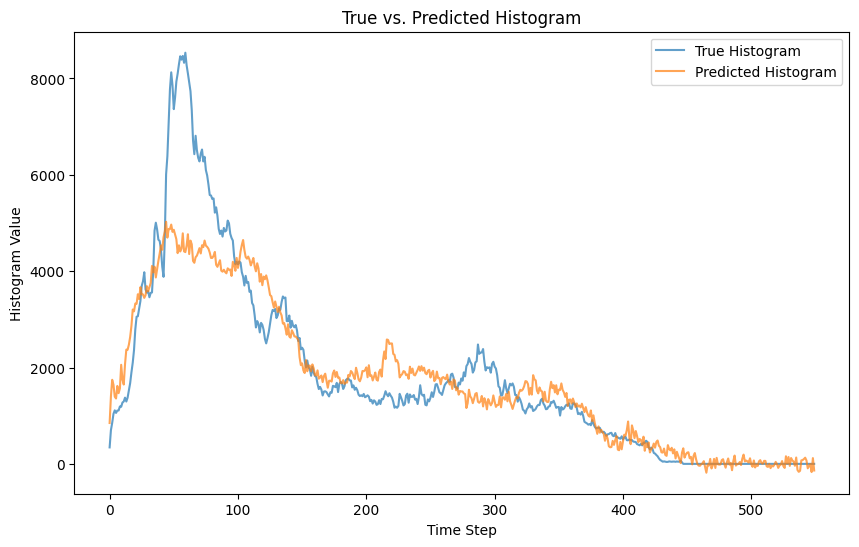

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5977769.5000
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - loss: 4245508.0000
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - loss: 2845986.0000
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step - loss: 1857049.5000
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step - loss: 1334549.8750
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step - loss: 1216698.1250
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 1290560.0000
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - loss: 1309805.6250
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - loss: 1222783.0000
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - loss: 1088310.2500
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - loss: 966555.2500
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - loss: 881749.1875
Epoch 13/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - loss: 833817.8750
Epoch 14/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - loss: 814257.3125
Epoch 15

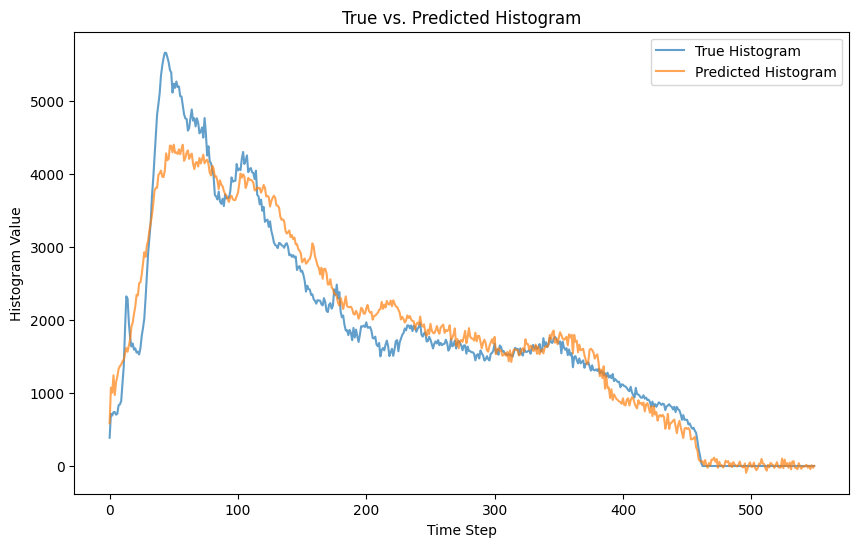

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5846390.5000
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - loss: 3914213.5000
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - loss: 2470539.2500
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - loss: 1585404.7500
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step - loss: 1232551.2500
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step - loss: 1235435.7500
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - loss: 1295651.3750
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 1273059.7500
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 1168930.6250
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 1033512.1250
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 917791.5625
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - loss: 843709.9375
Epoch 13/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - loss: 806894.6250
Epoch 14/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 792763.2500
Epoch 15

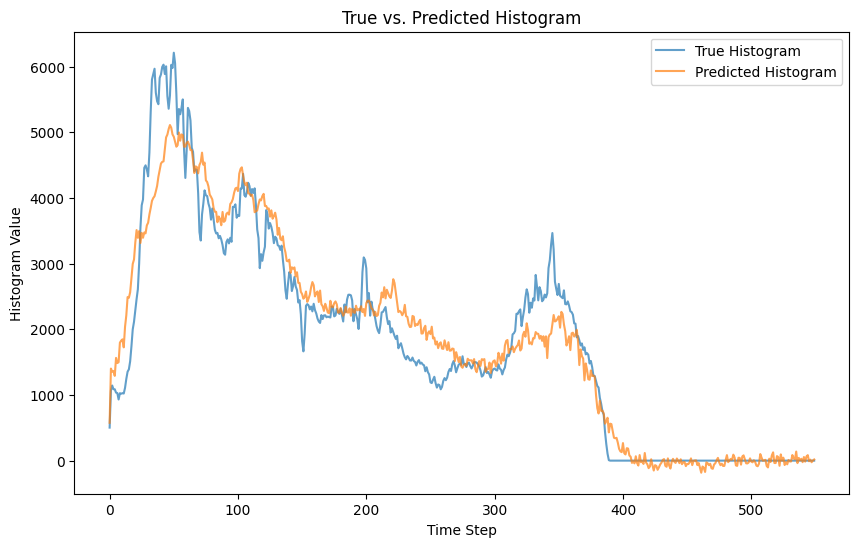

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5930909.5000
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - loss: 3835937.2500
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - loss: 2319384.2500
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step - loss: 1480225.5000
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - loss: 1275029.0000
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - loss: 1345891.0000
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - loss: 1338205.5000
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - loss: 1232581.3750
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 1087742.1250
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 958549.5625
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - loss: 874585.0000
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - loss: 836659.6250
Epoch 13/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - loss: 827973.0625
Epoch 14/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - loss: 827100.9375
Epoch 15/

In [ ]:
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# LOO Leave One Out
loo = LeaveOneOut()


for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(550, 14)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(550, activation='linear')) #550 since we have 550 time steps
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1)

    # Evaluate the model
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test MSE for this fold: {loss}")

    # Make predictions
    y_pred = model.predict(X_test).flatten()

    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test.flatten(), y_pred))
    print(f"Test RMSE for this fold: {rmse}")


    # Plot the true vs. predicted histograms
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.flatten(), label='True Histogram', alpha=0.7)
    plt.plot(y_pred, label='Predicted Histogram', alpha=0.7)
    plt.xlabel('Time Step')
    plt.ylabel('Histogram Value')
    plt.title('True vs. Predicted Histogram')
    plt.legend()
    plt.show()

